In [1]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Google_clustering')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756181 sha256=d203516000075323329f11bdd99f552ca025202128f37dc73cc84938df187e07
  Stored in directory: /tmp/pip-ephem-wheel-cache-y0unmpky/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mpl_toolkits.basemap import Basemap
%matplotlib inline


In [14]:
locat=pd.read_json('Location History.json')

In [15]:
print("There are {:,} rows in the Location History data set.".format(len(locat)))

There are 293,536 rows in the Location History data set.


In [18]:
pd.set_option('Display.max_colwidth', 100)
locat.head()
#Set has only one column 'locations' with timestampMs, latitudeE7 and longitudeE7 in it

,locations
0,"{'timestampMs': '1465965720372', 'latitudeE7': 130057429, 'longitudeE7': 802516119, 'accuracy': 37}"
1,"{'timestampMs': '1465965739870', 'latitudeE7': 130057432, 'longitudeE7': 802516120, 'accuracy': 36}"
2,"{'timestampMs': '1468842511651', 'latitudeE7': 107287787, 'longitudeE7': 790224243, 'accuracy': ..."
3,"{'timestampMs': '1468842535413', 'latitudeE7': 107287879, 'longitudeE7': 790226594, 'accuracy': ..."
4,"{'timestampMs': '1468842550427', 'latitudeE7': 107287826, 'longitudeE7': 790224403, 'accuracy': ..."


In [19]:
#Creating new columns with latitude, longitude and timestamp
locat['lat'] = locat['locations'].map(lambda x: x['latitudeE7'])
locat['long'] = locat['locations'].map(lambda x: x['longitudeE7'])
locat['timestamp_ms'] = locat['locations'].map(lambda x: x['timestampMs'])



In [ ]:
locat.head()

In [20]:
#Coverting lat/long to decimalized degree and timestamp_ms to date-time
locat['lat'] = locat['lat'] / 10.**7
locat['long'] = locat['long'] / 10.**7
locat['timestamp_ms'] = locat['timestamp_ms'].astype(float) / 1000
locat['datetime'] = locat['timestamp_ms'].map(lambda x: dt.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
date_range = '{}-{}'.format(locat['datetime'].min()[:4], locat['datetime'].max()[:4])

In [ ]:
locat.head()

,locations,lat,long,timestamp_ms,datetime
0,"{'timestampMs': '1465965720372', 'latitudeE7': 130057429, 'longitudeE7': 802516119, 'accuracy': 37}",13.005743,80.251612,1.465966e+09,2016-06-15 04:42:00
1,"{'timestampMs': '1465965739870', 'latitudeE7': 130057432, 'longitudeE7': 802516120, 'accuracy': 36}",13.005743,80.251612,1.465966e+09,2016-06-15 04:42:19
2,"{'timestampMs': '1468842511651', 'latitudeE7': 107287787, 'longitudeE7': 790224243, 'accuracy': ...",10.728779,79.022424,1.468843e+09,2016-07-18 11:48:31
3,"{'timestampMs': '1468842535413', 'latitudeE7': 107287879, 'longitudeE7': 790226594, 'accuracy': ...",10.728788,79.022659,1.468843e+09,2016-07-18 11:48:55
4,"{'timestampMs': '1468842550427', 'latitudeE7': 107287826, 'longitudeE7': 790224403, 'accuracy': ...",10.728783,79.022440,1.468843e+09,2016-07-18 11:49:10


In [9]:
#Dropping unwanted columns
locat=locat.drop(labels=['locations','timestamp_ms'],axis=1,inplace=False)
locat.head()

,lat,long,datetime
0,13.005743,80.251612,2016-06-15 04:42:00
1,13.005743,80.251612,2016-06-15 04:42:19
2,10.728779,79.022424,2016-07-18 11:48:31
3,10.728788,79.022659,2016-07-18 11:48:55
4,10.728783,79.022440,2016-07-18 11:49:10


MAPPING THE DATASET

In [10]:
#Map colours
land_color = '#f5f5f3'
water_color = '#cdd2d4'
coastline_color = '#f5f5f3'
border_color = '#bbbbbb'
meridian_color = '#f5f5f3'
marker_fill_color = '#cc3300'
marker_edge_color = 'None'

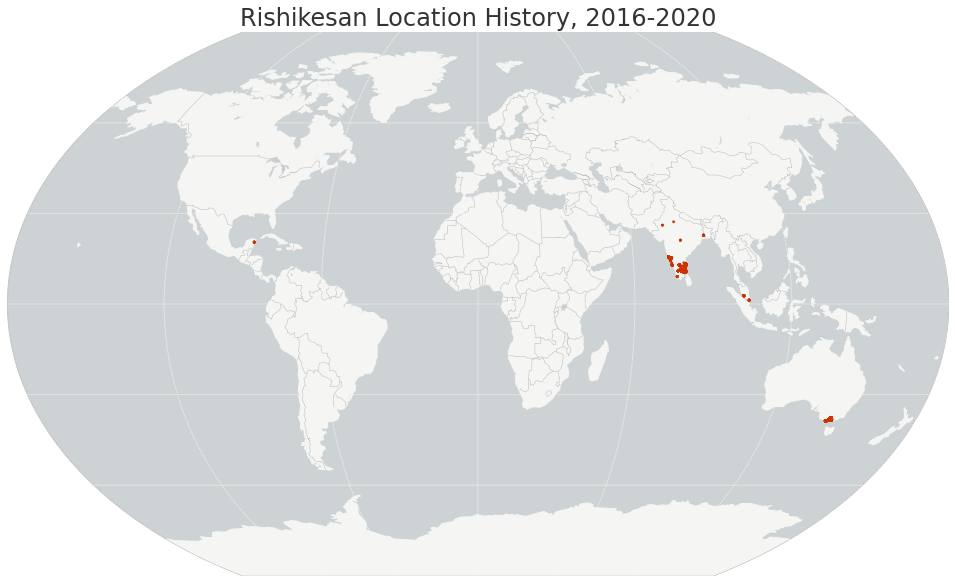

In [21]:
# create the plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
ax.set_title('Rishikesan Location History, {}'.format(date_range), fontsize=24, color='#333333')

#Drawing basemap
m = Basemap(projection='kav7', lon_0=0, resolution='c', area_thresh=10000)
m.drawmapboundary(color=border_color, fill_color=water_color)
m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawparallels(np.arange(-90., 120., 30.), color=meridian_color)
m.drawmeridians(np.arange(0., 420., 60.), color=meridian_color)

# Projecting the location history points then scatter plotting them
x, y = m(locat['long'].values, locat['lat'].values)
m.scatter(x, y, s=8, color=marker_fill_color, edgecolor=marker_edge_color, alpha=1, zorder=3)

#Map
plt.savefig('My_location_history')
plt.show()

I have never been to Mexico or North India, but the mapping clearly shows in those areas as well. 


---

I'm gonna have to figure out the why.

In [47]:
# Definig a transverse mercator projection for Victoria, Australia
map_width_m = 1000 * 1000
map_height_m = 1200 * 1000
target_crs = {'datum':'WGS84',
              'ellps':'WGS84',
              'proj':'tmerc',
              'lon_0':144.96,
              'lat_0':-37.02}

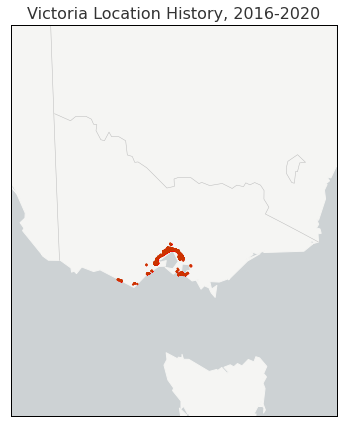

In [48]:
# plot the map
#plt.figure(figsize=(30,10))

fig_width = 6
fig = plt.figure(figsize=[fig_width, fig_width * map_height_m / float(map_width_m)])
ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
ax.set_title('Victoria Location History, {}'.format(date_range), fontsize=16, color='#333333')

m = Basemap(ellps=target_crs['ellps'],
            projection=target_crs['proj'],
            lon_0=target_crs['lon_0'], 
            lat_0=target_crs['lat_0'],
            width=map_width_m, 
            height=map_height_m,
            resolution='l',
            area_thresh=10000)

m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawstates(color=border_color)
m.drawmapboundary(fill_color=water_color)

x, y = m(locat['long'].values, locat['lat'].values)
m.scatter(x, y, s=5, color=marker_fill_color, edgecolor=marker_edge_color, alpha=1, zorder=10)
m.plot(x, y, 'ro', markersize=0.5)

plt.show()

In [49]:
# Definig a transverse mercator projection for Tamil Nadu, India

map_width_m = 1000 * 1000
map_height_m = 1200 * 1000
target_crs = {'datum':'WGS84',
              'ellps':'WGS84',
              'proj':'tmerc',
              'lon_0':78.656891,
              'lat_0':11.127123}

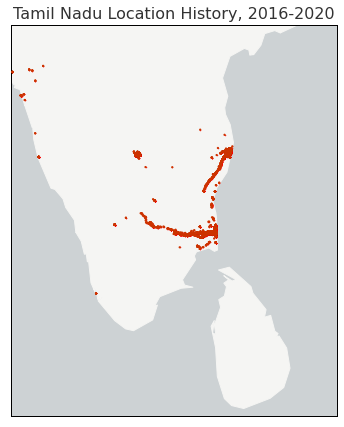

In [50]:

fig_width = 6
fig = plt.figure(figsize=[fig_width, fig_width * map_height_m / float(map_width_m)])
ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
ax.set_title('Tamil Nadu Location History, {}'.format(date_range), fontsize=16, color='#333333')

m = Basemap(ellps=target_crs['ellps'],
            projection=target_crs['proj'],
            lon_0=target_crs['lon_0'], 
            lat_0=target_crs['lat_0'],
            width=map_width_m, 
            height=map_height_m,
            resolution='l',
            area_thresh=10000)

m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawstates(color=border_color)
m.drawmapboundary(fill_color=water_color)

x, y = m(locat['long'].values, locat['lat'].values)
m.scatter(x, y, s=5, color=marker_fill_color, edgecolor=marker_edge_color, alpha=1, zorder=10)
m.plot(x, y, 'ro', markersize=0.5)

plt.show()